In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
/kaggle/input/bitcoin-tweets/Bitcoin_tweets.csv
/kaggle/input/pricevalues/price.csv


In [2]:
df_path = "../input/bitcoin-tweets/Bitcoin_tweets.csv"
df = pd.read_csv(df_path)
df.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


In [7]:
df. dropna(subset = ["hashtags"], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head()

KeyError: ['hashtags']

In [10]:
stop_words = nltk.corpus.stopwords.words(['english'])
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer  
lem = WordNetLemmatizer()

def cleaning(data):
    tweet_without_url = re.sub(r'http\S+',' ', data)
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned)

In [11]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df.head()

,tweets,cleaned_tweets
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price
4,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link


In [12]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [13]:
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,tweets,cleaned_tweets,subjectivity,polarity
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,0.0,0.00
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,0.1,0.00
4,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...,0.2,-0.25
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,0.5,0.40


In [14]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df.head()

,tweets,cleaned_tweets,subjectivity,polarity,sentiment
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00,neutral
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,0.0,0.00,neutral
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,0.1,0.00,neutral
4,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...,0.2,-0.25,negative
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,0.5,0.40,positive


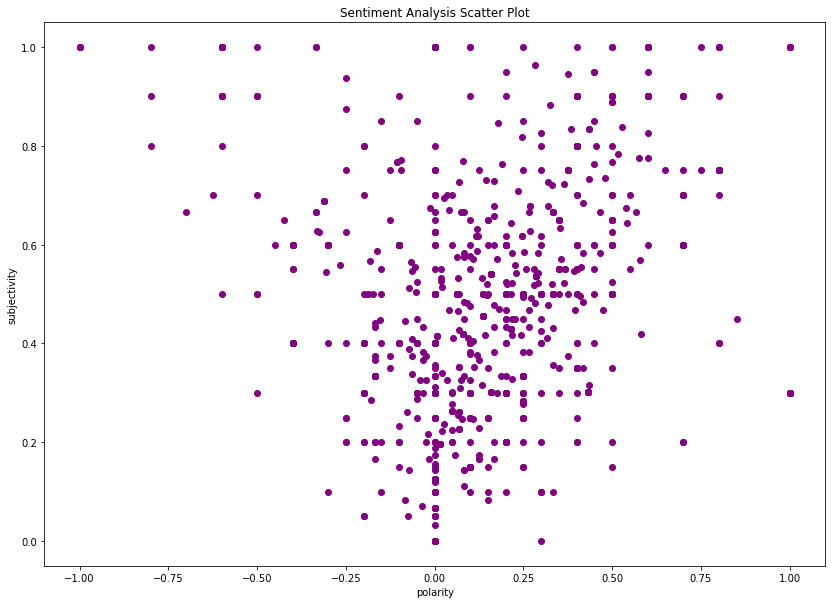

In [15]:
plt.figure(figsize=(14,10))
for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

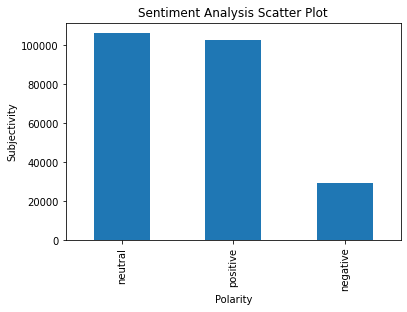

In [16]:
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [17]:
print(df.shape)

(237474, 5)


In [18]:
df2 = df
dr = pd.read_csv(df_path)
df2['date'] = dr[['date']]
df2.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tweets,cleaned_tweets,subjectivity,polarity,sentiment,date
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00,neutral,2021-02-10 23:59:04
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,0.0,0.00,neutral,2021-02-10 23:58:48
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,0.1,0.00,neutral,2021-02-10 23:54:33
4,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...,0.2,-0.25,negative,2021-02-10 23:54:06
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,0.5,0.40,positive,2021-02-10 23:53:30


In [19]:
dt = df2
dt.drop(df.index[1183:dt.shape[0]-1], inplace=True)
dt

,tweets,cleaned_tweets,subjectivity,polarity,sentiment,date
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank share halted NYSE ATM announce...,0.100000,0.000000,neutral,2021-02-10 23:59:04
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,0.000000,0.000000,neutral,2021-02-10 23:58:48
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,0.100000,0.000000,neutral,2021-02-10 23:54:33
4,This network is secured by 9 508 nodes as of t...,This network secured node today Soon biggest b...,0.200000,-0.250000,negative,2021-02-10 23:54:06
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,0.500000,0.400000,positive,2021-02-10 23:53:30
...,...,...,...,...,...,...
1460,"BTC-USD\n🟢 44,707\nUP spike of 202\n(since 15 ...",BTC USD UP spike since second ago Follow u rea...,0.150000,0.100000,positive,2021-02-10 15:11:13
1461,Sold #Bitcoin in 2018 to buy my wife an engage...,Sold buy wife engagement ring Couldda sold tod...,0.000000,0.000000,neutral,2021-02-10 15:11:10
1462,Bull Hopium Right now. \n\n#Bitcoin #BTC https...,Bull Hopium Right,0.535714,0.285714,positive,2021-02-10 15:11:06
1464,@Johnnydelight2 @elonmusk Right here w/ @Binan...,Right w Referral Code,0.535714,0.285714,positive,2021-02-10 15:11:01


In [20]:
def getBestModel(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    trained_models = list(map(lambda model: model.fit(X_train_norm, y_train), models))
    accuracy_results = list(map(lambda model: accuracy_score(model.predict(X_test_norm), y_test), trained_models))
    best_result_index = 0
    for model_index in range(1, len(accuracy_results)):
        if (accuracy_results[model_index] > accuracy_results[best_result_index]):
            best_result_index = model_index
    return accuracy_results

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
dl_path = "../input/pricevalues/price.csv"
dl = pd.read_csv(dl_path)
dl.head(10)
X = dt.loc[:, ['polarity', 'subjectivity']]
y = []
for i in range(1, len(dl['price'])):
    if dl['price'][i] > dl['price'][i - 1]:
        y.append(1)
    else:
        y.append(0)
models = [SVC(), MLPClassifier(), BernoulliNB(), tree.DecisionTreeClassifier(), KNeighborsClassifier()]
best_model = getBestModel(models, X, y)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [23]:
dl_path = "../input/pricevalues/price.csv"
dl = pd.read_csv(dl_path)
dl.head(10)
X = dt.loc[:, ['polarity', 'subjectivity']]
X = np.array(X)
sentiment = dt['sentiment']
sentiment = np.array(sentiment)
y = []
for i in range(1, len(dl['price'])):
    if (sentiment[i - 1] == 'positive' or sentiment[i-1] == 'neutral') and dl['price'][i] > dl['price'][i - 1]:   
        y.append(1)
    else:
        y.append(0)

print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
print(len(X_train), X_train[0], y_train[0], X_train_norm[0])
print(len(X_test), X_test[0], y_test[0], X_test_norm[0])

1184
1184
947 [0. 0.] 1 [-0.37450039 -0.91839066]
237 [0.  0.3] 0 [-0.27204264  0.15411576]


In [24]:
models = [SVC(), MLPClassifier(), BernoulliNB(), tree.DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression()]
accuracies = getBestModel(models, X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
for i in range(len(models)):
    print('Model Name: ', models[i])
    print("Accuracy: ", accuracies[i])

Model Name:  SVC()
Accuracy:  0.55
Model Name:  MLPClassifier()
Accuracy:  0.6166666666666667
Model Name:  BernoulliNB()
Accuracy:  0.55
Model Name:  DecisionTreeClassifier()
Accuracy:  0.5666666666666667
Model Name:  KNeighborsClassifier()
Accuracy:  0.5166666666666667
Model Name:  LogisticRegression()
Accuracy:  0.5833333333333334


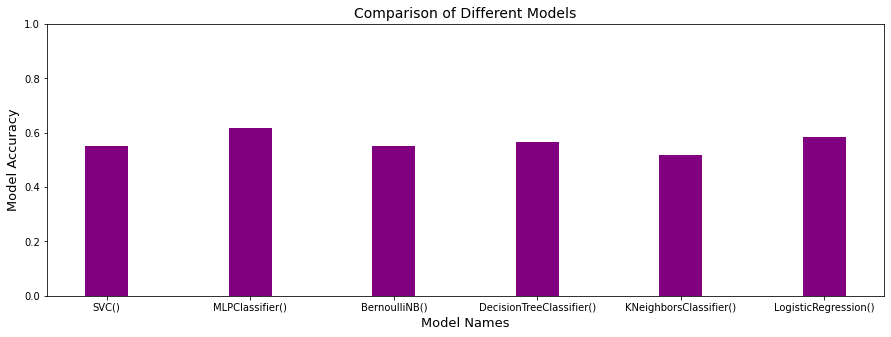

In [26]:
a = []
for i in range(0, len(models)):
    a.append(str(models[i]))
b = list(accuracies)
fig = plt.figure(figsize = (15, 5))
ax = plt.bar(a, b, color ='purple',width = 0.3)
plt.ylim(0.0, 1.0)
plt.xlabel("Model Names",fontsize=13)
plt.ylabel("Model Accuracy",fontsize=13)
plt.title("Comparison of Different Models", fontsize=14)
plt.show()